In [8]:
!ls

cases_meta.tsv	       gdc-client_v1.3.0_Ubuntu14.04_x64.zip  Lab 10.ipynb
file_case_id_DNA.csv   GDC.log				      live_miRNA
files.2018-10-18.json  gdc_manifest.2018-10-19.txt	      __MACOSX
files_meta.tsv	       GDCproject-yue-2			      miRNA_matrix.csv
gdc-client	       GDCproject-yue-2.zip


In [9]:
!python3 ./GDCproject-yue-2/src/predict.py

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[2018-10-23 03:14:18,394 - GDC - INFO] Percentage of tumor cases in training set is 0.8619631901840491
[2018-10-23 03:14:18,394 - GDC - INFO] Percentage of tumor cases in test set is 0.9071428571428571
[2018-10-23 03:14:20,884 - GDC - INFO] selected features are [88, 185, 186, 969, 1099, 1236]
[2018-10-23 03:14:23,969 - GDC - INFO] scores are {'LogisticRegression': [0.984251968503937, 0.9714285714285714, 0.984251968503937, 0.984251968503937, 0.8461538461538461], 'ExtraTreesClassifier': [0.9841269841269841, 0.9642857142857143, 0.9802371541501976, 0.9763779527559056, 0.8461538461538461], 'RandomForestClassifier': [0.9921259842519685, 0.9857142857142858, 0.9921259842519685, 0.9921259842519685, 0.9230769230769231], 'AdaBoostClassifier': [1.0, 0.9857142857142

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[2018-10-23 03:14:24,451 - GDC - INFO] Percentage of tumor cases in training set is 0.8619631901840491
[2018-10-23 03:14:24,452 - GDC - INFO] Percentage of tumor cases in test set is 0.9071428571428571
[2018-10-23 03:14:26,870 - GDC - INFO] selected features are [88, 185, 186, 969, 1099, 1236]
[2018-10-23 03:14:29,586 - GDC - INFO] scores are {'LogisticRegression': [0.984251968503937, 0.9714285714285714, 0.984251968503937, 0.984251968503937, 0.8461538461538461], 'ExtraTreesClassifier': [0.9841269841269841, 0.9642857142857143, 0.9802371541501976, 0.9763779527559056, 0.8461538461538461], 'RandomForestClassifier': [0.9921259842519685, 0.9857142857142858, 0.9921259842519685, 0.9921259842519685, 0.9230769230769231], 'AdaBoostClassifier': [1.0, 0.9857142857142

['LogisticRegression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'SVC']


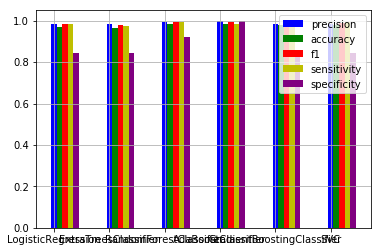

In [10]:
%matplotlib inline
%run ./GDCproject-yue-2/src/predict.py

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[2018-10-23 03:14:30,000 - GDC - INFO] Percentage of tumor cases in training set is 0.8619631901840491
[2018-10-23 03:14:30,001 - GDC - INFO] Percentage of tumor cases in test set is 0.9071428571428571
[2018-10-23 03:14:32,516 - GDC - INFO] selected features are [88, 185, 186, 969, 1099, 1236]
[2018-10-23 03:14:35,244 - GDC - INFO] scores are {'LogisticRegression': [0.984251968503937, 0.9714285714285714, 0.984251968503937, 0.984251968503937, 0.8461538461538461], 'ExtraTreesClassifier': [0.9841269841269841, 0.9642857142857143, 0.9802371541501976, 0.9763779527559056, 0.8461538461538461], 'RandomForestClassifier': [0.9921259842519685, 0.9857142857142858, 0.9921259842519685, 0.9921259842519685, 0.9230769230769231], 'AdaBoostClassifier': [1.0, 0.9857142857142

['LogisticRegression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'SVC']


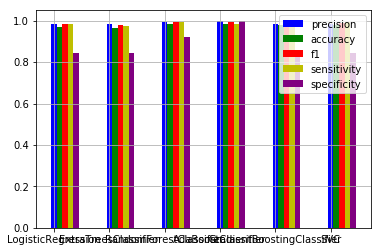

In [11]:
# %load ./GDCproject-yue-2/src/predict.py
# copyright: yueshi@usc.edu
import pandas as pd 
import hashlib
import os 
from utils import logger
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from utils import logger
#def lassoSelection(X,y,)

def lassoSelection(X_train, y_train, n):
    '''
    Lasso feature selection.  Select n features. 
    '''
    #lasso feature selection
    #print (X_train)
    clf = LassoCV()
    sfm = SelectFromModel(clf, threshold=0)
    sfm.fit(X_train, y_train)
    X_transform = sfm.transform(X_train)
    n_features = X_transform.shape[1]
    
    #print(n_features)
    while n_features > n:
        sfm.threshold += 0.01
        X_transform = sfm.transform(X_train)
        n_features = X_transform.shape[1]
    features = [index for index,value in enumerate(sfm.get_support()) if value == True  ]
    logger.info("selected features are {}".format(features))
    return features


def specificity_score(y_true, y_predict):
    '''
    true_negative rate
    '''
    true_negative = len([index for index,pair in enumerate(zip(y_true,y_predict)) if pair[0]==pair[1] and pair[0]==0 ])
    real_negative = len(y_true) - sum(y_true)
    return true_negative / real_negative 

def model_fit_predict(X_train,X_test,y_train,y_test):

    np.random.seed(2018)
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import precision_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    models = {
        'LogisticRegression': LogisticRegression(),
        'ExtraTreesClassifier': ExtraTreesClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'SVC': SVC()
    }
    tuned_parameters = {
        'LogisticRegression':{'C': [1, 10]},
        'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
        'RandomForestClassifier': { 'n_estimators': [16, 32] },
        'AdaBoostClassifier': { 'n_estimators': [16, 32] },
        'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
        'SVC': {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    }
    scores= {}
    for key in models:
        clf = GridSearchCV(models[key], tuned_parameters[key], scoring=None,  refit=True, cv=10)
        clf.fit(X_train,y_train)
        y_test_predict = clf.predict(X_test)
        precision = precision_score(y_test, y_test_predict)
        accuracy = accuracy_score(y_test, y_test_predict)
        f1 = f1_score(y_test, y_test_predict)
        recall = recall_score(y_test, y_test_predict)
        specificity = specificity_score(y_test, y_test_predict)
        scores[key] = [precision,accuracy,f1,recall,specificity]
    #print(scores)
    return scores



def draw(scores):
    '''
    draw scores.
    '''
    import matplotlib.pyplot as plt
    logger.info("scores are {}".format(scores))
    ax = plt.subplot(111)
    precisions = []
    accuracies =[]
    f1_scores = []
    recalls = []
    categories = []
    specificities = []
    N = len(scores)
    ind = np.arange(N)  # set the x locations for the groups
    width = 0.1        # the width of the bars
    for key in scores:
        categories.append(key)
        precisions.append(scores[key][0])
        accuracies.append(scores[key][1])
        f1_scores.append(scores[key][2])
        recalls.append(scores[key][3])
        specificities.append(scores[key][4])

    precision_bar = ax.bar(ind, precisions,width=0.1,color='b',align='center')
    accuracy_bar = ax.bar(ind+1*width, accuracies,width=0.1,color='g',align='center')
    f1_bar = ax.bar(ind+2*width, f1_scores,width=0.1,color='r',align='center')
    recall_bar = ax.bar(ind+3*width, recalls,width=0.1,color='y',align='center')
    specificity_bar = ax.bar(ind+4*width,specificities,width=0.1,color='purple',align='center')

    print(categories)
    ax.set_xticks(np.arange(N))
    ax.set_xticklabels(categories)
    ax.legend((precision_bar[0], accuracy_bar[0],f1_bar[0],recall_bar[0],specificity_bar[0]), ('precision', 'accuracy','f1','sensitivity','specificity'))
    ax.grid()
    plt.show()

if __name__ == '__main__':


    data_dir ="/home/ubuntu/Downloads/"

    data_file = data_dir + "miRNA_matrix.csv"

    df = pd.read_csv(data_file)
    # print(df)
    y_data = df.pop('label').values

    df.pop('file_id')

    columns =df.columns
    #print (columns)
    X_data = df.values
    
    # split the data to train and test set
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
    

    #standardize the data.
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # check the distribution of tumor and normal sampels in traing and test data set.
    logger.info("Percentage of tumor cases in training set is {}".format(sum(y_train)/len(y_train)))
    logger.info("Percentage of tumor cases in test set is {}".format(sum(y_test)/len(y_test)))
    
    n = 7
    feaures_columns = lassoSelection(X_train, y_train, n)



    scores = model_fit_predict(X_train[:,feaures_columns],X_test[:,feaures_columns],y_train,y_test)

    draw(scores)
    #lasso cross validation
    # lassoreg = Lasso(random_state=0)
    # alphas = np.logspace(-4, -0.5, 30)
    # tuned_parameters = [{'alpha': alphas}]
    # n_fold = 10
    # clf = GridSearchCV(lassoreg,tuned_parameters,cv=10, refit = False)
    # clf.fit(X_train,y_train)

In [9]:
# decision regions plot code is from the mlxtend library 

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # setting up marker generator and color map
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())
    # plot the decision surface
    for idx, cl in enumerate(np.unique(y)): plt.scatter(x=X[y == cl, 0],
                             y=X[y == cl, 1],
                             alpha=0.6,
                             c=cmap(idx),
                             edgecolor='black',
                             marker=markers[idx],
                             label=cl)
    # plot class samples

In [10]:
import os 
import pandas as pd 
import numpy as np

data_dir ="/home/ubuntu/Downloads/"

data_file = data_dir + "miRNA_matrix.csv"

df = pd.read_csv(data_file)

#df.head()

In [11]:
from sklearn.model_selection import train_test_split
y_data = df.pop('label').values
df.pop('file_id')
columns = df.columns
X_data = df.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


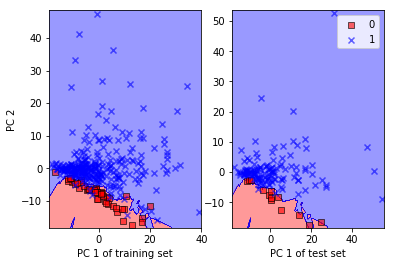

In [13]:
plt.subplot(1, 2, 1)
plot_decision_regions(X_train_pca, y_train, classifier=knn)
plt.xlabel('PC 1 of training set')
plt.ylabel('PC 2')
plt.subplot(1, 2, 2)
plot_decision_regions(X_test_pca, y_test, classifier=knn)
plt.xlabel('PC 1 of test set')
plt.legend(loc='best')
plt.show()

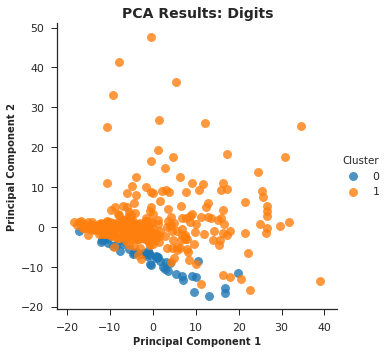

In [14]:
pc = pca.fit_transform(X_train_std)
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2'])
pc_df['Cluster'] = y_train

# Plot Digits PCA
import seaborn as sns
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Component 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Component 2', weight='bold').set_fontsize('10')


NameError: name 'logger' is not defined

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.82      0.69      0.75        13
          1       0.97      0.98      0.98       127

avg / total       0.95      0.96      0.96       140

[[  9   4]
 [  2 125]]


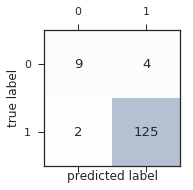

In [17]:
from sklearn.metrics import classification_report

print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_test, y_pred=y_pred))

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

confmat = confusion_matrix(y_test, y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) 

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]): 
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

Average precision-recall score: 0.97


Text(0.5,1,'2-class Precision-Recall curve: AP=0.97')

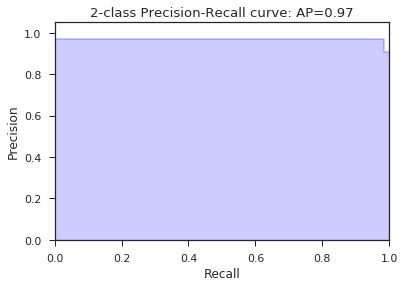

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


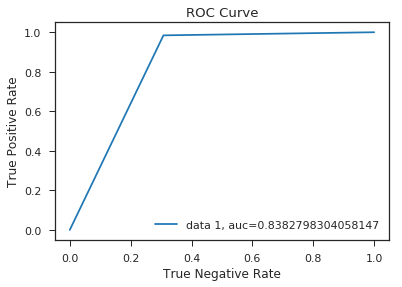

In [19]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('ROC Curve')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()